# **Técnicas Avanzadas de Machine Learning**

---
---
<!-- Star Wars: Episodio VII - El despertar de la Fuerza -->

<!-- script html for image -->
<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/4/49/Star_Wars_The_Force_Awakens.jpg' width="650" height="300" />

</figure></center>

Fuente de la imagen: [Wikipedia](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_VII_-_El_despertar_de_la_Fuerza)

# **Índice**

---








> [1 - Redes Neuronales](#scrollTo=jRkEdZ8AIwyS)
>> [1.1. Primeros modelos de Red Neuronal Artificial: el Perceptrón](#scrollTo=WtubWJRD5277)
>>
>>>[1.1.1. Nomenclatura del perceptrón](#scrollTo=P0Y_EH1IKesk)
>>>
>>>[1.1.2. Limitaciones y aportaciones del perceptrón](#scrollTo=dsRL59WVMrWa)
>>
>> [1.2. Perceptrón con función de activación sigmoide - Regresión logística](#scrollTo=0iAJm-csZs-u)
>>
>> [1.3. Perceptrón multicapa](#scrollTo=V0JwpIJldB7G)
>>
>>>[1.3.1. Ecuaciones de la propagación hacia adelante](#scrollTo=JzpbARx7iJKe)
>>
>> [1.4. Perceptrón multiclase - Función de activación softmax](#scrollTo=wDt23onanPBN)
>>
>> [1.5. Backpropagation - Gradient Descent](#scrollTo=2rXCGLevZTxJ)
>>
>>>[1.5.1. Ejemplo: Perceptrón simple con sigmoide](#scrollTo=4_UAH8vgJoBU)
>>>
>>>[1.5.2. Ejemplo: Perceptrón con una capa oculta - Relta delta generalizada](#scrollTo=J7JSo7jOiyVL)
>>
>> [1.6. Consideraciones acerca del entrenamiento](#scrollTo=9I8o17DOhzZV)
>>>
>>>[1.6.1. Tasa de aprendizaje (learning rate)](#scrollTo=xCFF6r-H62mx)
>>>
>>>[1.6.2. Overfitting y Underfitting](#scrollTo=1h5ONv1hnyQ-)
>>>
>>>[1.6.3. Vanishing gradient - Exploding gradient](#scrollTo=AOuOcJU4v3_t)
>>>
>> [1.7. Redes Neuronales Convolucionales](#scrollTo=Y2oWVlmsdzLZ)
>>
>> [Actividad: Perceptrón para implementar funciones booleanas](#scrollTo=GqK76NVLCGay)
>>
>>> [Solución](#scrollTo=EqNgLERx-Bwg&line=1&uniqifier=1)
>>
>> [Ideas clave](#scrollTo=e6aV-SSRCNWx)



# 1 - Redes Neuronales

## 1.1. Primeros modelos de Red Neuronal Artificial: el Perceptrón
Los primeros modelos de Red Neuronal Artificial se basaban en algunos aspectos de la neurona biológica descubiertos por Santiago Ramón y Cajal a finales del siglo XIX y elaborados desde la lógica proposicional (McCulloch y Pitts, 1943) y con el objetivo de desarrollar un ordenador a partir del Perceptrón (Rosenblatt, 1958). Entre estos aspectos podemos destacar los siguientes:
* el núcleo de una neurona recibe señal de entrada de las dendritas conectadas a las sinapsis de salida de otras neuronas
* si la suma de las entradas ponderadas excede un umbral, se genera un impulso
* este impulso se transmite a otras neuronas a través de las sinapsis de salida

Podemos modelizar este comportamiento con la imagen siguiente del Perceptrón de Rosenblatt, en la que se señalan las partes de una neurona equivalente:

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/perceptron_vs_neurona.png' width="700" height="400" />
<figcaption>Imagen1. Comparativa entre una neurona y un perceptrón </figcaption></center>
</figure>

Fuente: https://es.wikipedia.org/wiki/Neurona y [elaboración propia](https://github.com/albertojulian/master-ub/raw/main/perceptron_vs_neurona.png)


### 1.1.1. Nomenclatura del perceptrón
* A la entrada del Perceptrón tenemos un vector **x** con "n" características o dimensiones.

* Se realiza una suma de las características de entrada ponderadas con los pesos (weight) de un vector **w**, lo que equivale al **producto escalar**:

$$ z = \sum _{i=0}^{n-1} w_i x_i = w \cdot x \text{ (producto escalar)} $$

<br>

* Se aplica una **función de activación**, que en este caso es la función step (escalón) que compara la suma con un umbral, de forma que si se supera se activa la salida de la neurona:

$$ a(x) = \begin{cases}
1&\text{si $(z=w \cdot x) > 0$}\\
0&\text{si $(z=w \cdot x) < 0$}\\
\end{cases} $$

<br>

* Para poder variar el umbral se añade un valor **b (bias)** a la entrada, de forma que:

$$ a(x) = \begin{cases}
1&\text{si $(z=w \cdot x + b) > 0$}\\
0&\text{si $(z=w \cdot x + b) < 0$}\\
\end{cases} $$

<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

Para integrar la suma de $b$ en el producto escalar al calcular $z$, se suele considerar que $b$ tiene un valor de 1 y que tiene su correspondiente peso entrenable. Así, $w$ será un vector de "n+1" valores.

Podemos observar que la suma ponderada $z$ es una **regresión lineal**.


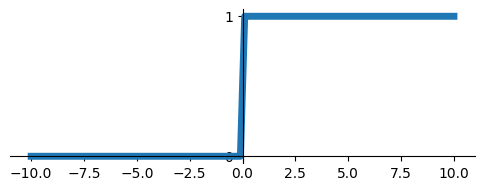

Imagen2. Función de activación escalón (step)


In [2]:
# Función de activación escalón (step)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, num=100)
y = np.heaviside(x, 0.5)

plt.figure(figsize=(6, 2))
ax = plt.gca()  # gca significa 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.yticks([0, 1])
plt.plot(x, y, linewidth=5)
plt.show()
plt.close()
print("Imagen2. Función de activación escalón (step)")

### 1.1.2. Limitaciones y aportaciones del perceptrón
La limitación principal del perceptrón es que solo funciona con datasets separables linealmente. Así, es capaz de representar una función booleana como AND o OR, pero no XOR.

<!-- script html for image -->
<figure>
<center>

AND: Separable linealmente | OR: Separable linealmente | XOR: No separable linealmente
- | - | -
![](https://upload.wikimedia.org/wikipedia/commons/8/82/Computer.Science.AI.Neuron.AND.svg) | ![](https://upload.wikimedia.org/wikipedia/commons/4/48/Computer.Science.AI.Neuron.OR.svg) | ![](https://upload.wikimedia.org/wikipedia/commons/9/93/Computer.Science.AI.Neuron.XOR.svg)

<figcaption>Imagen3. Funciones lógicas vs. separabilidad lineal </center>
</figure>

Fuente: [https://es.wikipedia.org/wiki/Perceptrón](https://es.wikipedia.org/wiki/Perceptr%C3%B3n)

<br>

Cabe decir que, al igual que en su día se exageraron las posibilidades, también se exageró esta limitación, ya que se subsana al añadir capas de perceptrones sucesivas o en cascada. De hecho, la necesidad de encadenar neuronas artificiales para componer funciones lógicas complejas era algo que ya habían enunciado McCulloch y Pitts en 1943.

Esta exageración de las limitaciones fue uno de los causantes del primer invierno de la Inteligencia Artificial.

La principal aportación del perceptrón fue proporcionar un método sencillo de **clasificación lineal binaria** que, con muchas aportaciones posteriores, ha supuesto una de las bases del Deep Learning actual.



## 1.2. Perceptrón con función de activación sigmoide - Regresión logística
Una de las variantes inmediatas del perceptrón es sustituir la función de activación step (escalón) por una **sigmoide**:

$$ a(x) = \frac{1}{1+e^{-w \cdot x}}$$

<br>

La salida de la sigmoide se puede interpretar como **la probabilidad de una de las clases frente a la otra**, lo cual facilita el entrenamiento de la red comparado con la función step.


Como podemos observar, este cambio en la función de activación iguala al perceptrón a una **regresión logística**. En general, esta será la función de salida de un clasificador binario.




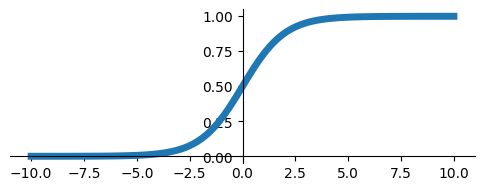

Imagen4. Función de activación sigmoide


In [2]:
# Función de activación sigmoide
x = np.linspace(-10, 10, num=100)
y = 1/(1 + np.exp(-x)) # sigmoide

plt.figure(figsize=(6, 2))
ax = plt.gca()  # gca significa 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.plot(x, y, linewidth=5)
plt.show()
plt.close()
print("Imagen4. Función de activación sigmoide")

## 1.3. Perceptrón multicapa
Ahora que hemos visto una configuración mínima de perceptrón, podemos superar la limitación de la linealidad añadiendo una capa oculta entre la entrada y la salida, como se puede ver en la imagen:

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/módulo_7_aprendizaje_automático_para_machine_learning/percep_1HL_binary_v2.png' width="700" height="400" />
<figcaption>Imagen5. Perceptrón con una capa oculta </figcaption></center>
</figure>

Fuente: [Elaboración propia](https://github.com/albertojulian/master-ub/raw/main/percep_1HL_binary_v2.png)

El cambio principal es que el vector de pesos **w** conectado a las entradas del perceptrón simple pasa a ser la matriz $W^{(0)}$ en este caso. Como consecuencia, el producto escalar de dos vectores pasa a ser un producto entre una matriz y un vector.

Indicamos la capa con superíndice entre paréntesis; así, $a^{(2)}$ se corresponde con la capa 2.

<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

Debe añadirse un nodo $b = 1$ también en la capa oculta.

### 1.3.1. Ecuaciones de la propagación hacia adelante

Observando el perceptrón de una capa oculta, podemos definir las ecuaciones del cálculo de la salida $a^{(2)}$ a partir de la entrada $ x $:

$$ z^{(1)} = W^{(0)} \cdot x $$

$$  a^{(1)} = g(z^{(1)}) $$

$$  z^{(2)} = W^{(1)} \cdot a^{(1)} $$

$$  a^{(2)} = g(z^{(2)}) $$

<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

Para que la matriz $W$ y el vector $x$ puedan multiplicarse, debe trasponerse la matriz $W$.


## 1.4. Perceptrón multiclase - Función de activación softmax
Se puede realizar clasificación multiclase sustituyendo la sigmoide de la salida por la **función de activación softmax**, a cuya salida se obtienen las probabilidades de las distintas clases.

La función softmax se caracteriza porque:
* normaliza las entradas convirtiéndolas en probabilidades de forma que a la salida todas tienen un valor entre 0 y 1

* la suma de todas las entradas es 1

* aumenta el mayor valor de entrada frente al resto

$$ \text{softmax}(x_j) = \frac{e^{x_j}}{\sum\limits_{i=0}^{n-1}e^{x_i}}  \text{ siendo $j\in[0, n-1]$}$$

<br>


En el ejemplo siguiente podemos ver cómo al aplicar la función softmax a un vector de valores arbitrarios (incluyendo valores negativos) se normalizan entre 0 y 1, a la vez que se resalta el máximo valor frente al resto.

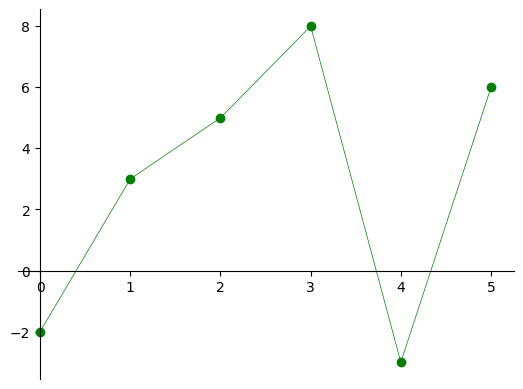

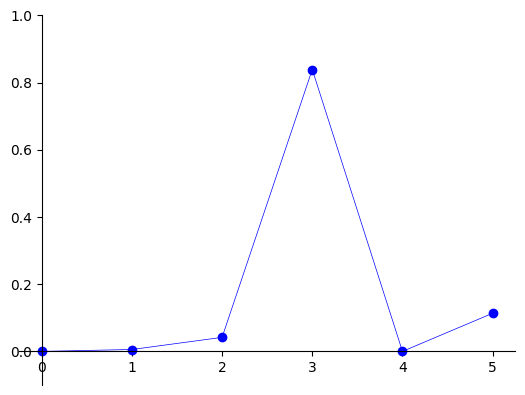

La suma de todas las salidas es 1.0

Imagen6. Ejemplo de valores y su transformación con la función softmax


In [3]:
# Función softmax
x = np.array([-2, 3, 5, 8, -3, 6])
softmax = np.exp(x)/np.sum(np.exp(x))

ax = plt.gca()  # gca significa 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.plot(x, color='green', marker='o', linewidth=0.5)
plt.show()
plt.close()

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.plot(softmax, color='blue', marker='o', linewidth=0.5)
plt.ylim((-0.1, 1))
plt.show()
plt.close()

print(f"La suma de todas las salidas es {round(sum(softmax), 5)}")
print("\nImagen6. Ejemplo de valores y su transformación con la función softmax")

In [4]:
np.exp(x)

array([1.35335283e-01, 2.00855369e+01, 1.48413159e+02, 2.98095799e+03,
       4.97870684e-02, 4.03428793e+02])

## 1.5. Backpropagation - Gradient Descent
Hasta ahora hemos visto cómo se obtiene la salida de una red neuronal a partir de la entrada.

Ahora pasamos a describir cómo entrenar la red o hacer que "aprenda", es decir cómo deben modificarse los **pesos** de la Red Neuronal para que la salida sea correcta.

Este proceso de entrenamiento se basa en el algoritmo de Backpropagation, enunciado inicialmente en la década de 1960 y desarrollado posteriormente
(Rumelhart y Hinton, 1986).

El objetivo último de la retropropagación  (backpropagation) es actualizar los pesos en función de su influencia en el error de salida, para lo que se utiliza el **descenso del gradiente (gradient descent)**.

Esta "influencia" se identifica matemáticamente con el gradiente del error, o derivada parcial del error con respecto al peso:

$$ w = w - \frac{\partial Error}{\partial w} $$

<br>

Hay dos **aspectos prácticos** a tener en cuenta:

* trabajamos con instantes de **tiempo discretos**, por lo que tiene sentido asignar el valor de w en el instante "t+1" en función del valor en el instante "t".

* se aplica un parámetro $\alpha$ aminorador del gradiente para evitar modificaciones bruscas ($\alpha < 1$). Este parámetro $\alpha$ se denomina **tasa de aprendizaje** (learning rate) y modula la rapidez del entrenamiento.

<br>

Así, la forma general del **descenso del gradiente** es:

$$ w(t+1) = w(t) - \alpha\frac{\partial Error}{\partial w} $$

La imagen siguiente justifica de forma intuitiva el nombre del **descenso del gradiente**: partimos de un punto con error elevado (color rojo) y queremos descender hasta alcanzar un mínimo; puede ocurrir que este mínimo sea local en lugar de global.

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://bdtechtalks.com/wp-content/uploads/2020/04/gradient-descent-local-minima.png' width="600" height="400" />
<figcaption>Imagen7. Mínimo local y global en un descenso de gradiente </figcaption></center>
</figure>

Fuente: [https://bdtechtalks.com](https://bdtechtalks.com/wp-content/uploads/2020/04/gradient-descent-local-minima.png)

<br>

Por otra parte, para aplicar el algoritmo, debe definirse una **función de coste, error o pérdida (loss)** a la salida, de forma que podamos evaluar cuánto se desvía la salida actual frente a la esperada según las etiquetas (labels, targets) del dataset de entrada.

También debe definirse una **métrica** que permita evaluar la calidad del entrenamiento.

Los **pasos principales** del proceso de retropropagación son:

* Paso 1: Inicializar los pesos de forma aleatoria.

* Paso 2: Aplicar el dataset de entrada y calcular hacia adelante hasta obtener una estimación de los valores de la salida.

* Paso 3: Evaluar la métrica y la función de coste, error o pérdida.

* Paso 4: Imputar desde la salida hacia atrás a cada peso según su relevancia en el error de salida.

* Paso 5: Actualizar los pesos.

* Repetir los pasos 2-5 hasta que se cumpla una de las condiciones siguientes:

  * se obtenga un valor de métrica objetivo
  * se estabilice la función de error
  * se alcance el máximo de iteraciones deseado

<br>
<p> <mark>SABÍAS QUE...</mark> </p>
<hr>

Los algoritmos, como el Stochastic Gradiente Descent (SGD, variante del Gradiente Descent) u otros, cuya función es optimizar la actualización de los pesos en el proceso de entrenamiento, reciben el nombre de **optimizadores**.

### 1.5.1. Ejemplo: Perceptrón simple con sigmoide
Recordemos las ecuaciones:

$$salida = \sigma(z) \text{ (siendo $\sigma$ la sigmoide))}$$

$$z=w \cdot x \text{ (incluyendo en $w$ el peso correspondiente a b)}$$


Veamos los pasos 3 y 4.

<br>

<font color='Blue'><b> Evaluación del error </b></font>

Podemos considerar el error a la salida como:

$$ Error = \frac{1}{2}(salida-y)^2 $$

$$ error = (salida-y) $$


<br>
<p> <mark>RECUERDA</mark> </p>
<hr>

"$y$" es el valor de la etiqueta (label o target), en nuestro caso 0 o 1.

<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

$salida$ puede indicarse como $\hat{y}$ ("$y$" estimada). En nuestro ejemplo va a ser una probabilidad (entre 0 y 1.0).

<br>

<font color='Blue'><b> Imputación del error hacia atrás (regla de la cadena y regla delta)</b></font>

Para realizar la imputación del error recurrimos a la **regla de la cadena** del cálculo diferencial:

$$\frac {\partial Error}{\partial w} = \frac {\partial Error}{\partial salida} \frac {\partial salida}{\partial z} \frac {\partial z}{\partial w}$$

Veamos cada término:

$$ \frac {\partial Error}{\partial salida} = error $$

$$ \frac {\partial salida}{\partial z} = \sigma^{'}(z) = \sigma(z) (1-\sigma(z)) $$

$$ \frac {\partial z}{\partial w} = \frac {\partial (w \cdot x)}{\partial w} = x $$

Finalmente, obtenemos:

$$\frac {\partial Error}{\partial w} = error \cdot \sigma^{'}(z) \cdot x = \delta \cdot x $$

Concluimos que:

$$  W(t+1) = W(t) - \alpha \cdot \delta \cdot x $$


La obtención del término $\delta$ se conoce como **regla delta**.


### 1.5.2. Ejemplo: Perceptrón con una capa oculta - Regla delta generalizada

En perceptrones con más capas, podemos generalizar el término $\delta$ del apartado anterior. Así, en un perceptrón con una capa oculta como el que vimos anteriormente, las ecuaciones de propagación hacia adelante son (como ya vimos):

$$ z^{(1)} = W^{(0)} \cdot x $$

$$  a^{(1)} = g(z^{(1)}) $$

$$  z^{(2)} = W^{(1)} \cdot a^{(1)} $$

$$  a^{(2)} = g(z^{(2)}) $$

<br>
Y las ecuaciones de propagación hacia atrás son:

$$  \delta^{(2)} = a^{(2)} - y $$

$$  \delta^{(1)} = W^{(1)} \cdot g^´(z^{(1)}) $$

<br>
Ahora ya podemos actualizar los pesos:

$$  W^{(1)}(t+1) = W^{(1)}(t) - \alpha \cdot \delta^{(2)} a^{(1)} $$

$$  W^{(0)}(t+1) = W^{(0)}(t) - \alpha \cdot \delta^{(1)} x $$

<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

En caso de clasificación **multiclase**, la función de activación a la salida no sería la sigmoide.

El cálculo del error total también cambia, ya que en lugar de una salida habría tantas como clases $k$:

$$ Error = \frac{1}{2}\sum_{i=0}^{k-1}(salida_i-y_i)^2 $$

$$ error = (error_0,.., error_i, .., error_{k-1}) $$

$$ error_i = (salida_i-y_i) $$


## 1.6. Consideraciones acerca del entrenamiento

### 1.6.1. Tasa de aprendizaje (learning rate)
$\alpha$ es un parámetro crítico y debe escogerse con el valor adecuado para el optimizador y el problema:

* un valor pequeño puede hacer converger en un mínimo local y parar el entrenamiento.

* un valor grande puede hacer que la red sea inestable y no converja.

Como valores típicos de $\alpha$ podemos considerar 0,001 o 0,0001.

Hay optimizadores que varían el valor de $\alpha$ durante el entrenamiento: disminuyen su valor cuando se está cerca de un mínimo para facilitar la convergencia.

### 1.6.2. Overfitting y Underfitting
Al igual que ocurre en otros modelos de Machine Learning, las Redes Neuronales se suelen ver afectadas por exceso de ajuste (overfitting) o defecto (underfitting).

En general, podemos decir que identificamos **overfitting** porque el modelo ofrece buenas métricas con el dataset de entrenamiento pero no con el dataset de prueba.

Hay múltiples motivos por los que puede ocurrir este desajuste:

* exceso de iteraciones de entrenamiento

* diferencias notables entre ambos datasets

* modelo demasiado complejo para el dataset

* dataset de entrenamiento escaso

Cuando un modelo de Red Neuronal es demasiado simple para el dataset, se produce **underfitting**.


### 1.6.3. Vanishing gradient - Exploding gradient
Las Redes Neuronales de muchas capas pueden presentar problemas de entrenamiento debido a desaparición (vanishing) o explosión del gradiente.

La anulación del gradiente (**Vanishing gradient**) se debe a la multiplicación de gradientes reducidos siguiendo la regla de la cadena; fue un problema identificado en la Redes Recurrentes, que veremos en un apartado posterior. Cuando se produce, los pesos no se modifican y la Red deja de entrenarse.

La explosión del gradiente (**Exploding gradient**) es el caso contrario: la multiplicación reiterada de valores elevados de gradiente desestabiliza el entrenamiento de la red.


## 1.7. Redes Neuronales Convolucionales

Uno de los avances más destacables por su repercusión posterior fue la aplicación de backpropagation a reconocimiento de dígitos manuscritos de MNIST (LeCun et al., 1989), en lo que sería la primera Red Neuronal Convolucional.

En una CNN se aprovechan las relaciones entre pixels cercanos en ambas dimensiones espaciales a uno dado, como puede observarse en la imagen siguiente.

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/cnn-mnist.png' width="450" height="400" />
<figcaption>Imagen8. Red Neuronal Convolucional de LeCun </figcaption></center>
</figure>

Fuente: [Backpropagation applied to handwritten zip code recognition](https://direct.mit.edu/neco/article/1/4/541/5515/Backpropagation-Applied-to-Handwritten-Zip-Code)



## Actividad: Perceptrón para implementar funciones booleanas

El **objetivo** de esta actividad es desarrollar un perceptrón mínimo e implementar funciones booleanas. Además veremos la importancia del "bias".

Los datos de entrada serán pares de 1 y 0, y la etiqueta correspondiente a la función a implementar.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    # N es el número de características del dataset de entrada
    # alpha es la tasa de aprendizaje (learning rate)
    def __init__(self, N, alpha=0.1):
        # inicializamos la matriz de pesos (W) y almacenamos N y alpha
        self.W = np.random.randn(N ) / np.sqrt(N)
        self.N = N
        self.alpha = alpha

    def step(self, x):
        # aplicamos la función de activación escalón (step)
        return 1 if x > 0 else 0

    def fit(self, X, y, epochs=10, addBias=True):
        # añadimos una columna de 1s como última entrada de la
        # matriz de características -- de esta forma podemos tratar
        # el sesgo (bias) como parámetro entrenable dentro de la
        # matriz de pesos
        if addBias:
            print("Bias =", addBias)
            X = np.c_[X, np.ones((X.shape[0]))]
            self.W = np.random.randn(self.N+1) / np.sqrt(self.N)
        w = np.zeros([epochs, X.shape[1]])
        # iteramos
        for epoch in np.arange(0, epochs):
            for (x, target) in zip(X, y):
            # realizamos el producto escalar y aplicamos la función escalón
            # para obtener la predicción
                p = self.step(np.dot(x, self.W))
                # actualizamos pesos si la predicción es distinta del target
                if p != target:
                    # calculamos delta
                    delta =  p - target
                    # actualizamos la matriz de pesos
                    self.W += -self.alpha * delta * x
            w[epoch] = self.W
        return w
    def predict(self, X, addBias=True):
        # aseguramos que X es matriz
        X = np.atleast_2d(X)
        # comprobamos si hay que añadir columna de "1" para bias
        if addBias:
            X = np.c_[X, np.ones((X.shape[0]))]
            # realizamos el producto escalar y aplicamos la función escalón
            # para obtener la predicción
        return self.step(np.dot(X, self.W))

### Solución

[*A continuación, haz clic para conocer la solución.*]

#### Dataset para función lógica OR

In [5]:
# construimos el dataset OR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# definimos el perceptrón y lo entrenamos
print("Entrenando perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20, addBias=False)

Entrenando perceptron...


array([[-0.08013208,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117],
       [ 0.01986792,  0.08060117]])

Ahora que el perceptrón está entrenado, podemos evaluarlo recorriendo el dataset.

In [6]:
print("Prueba de perceptron...")

for (x, target) in zip(X, y):
    # hacemos un predicción y comprobamos
    pred = p.predict(x,addBias=False)
    print("dato={}, target={}, pred={}".format(
        x, target[0], pred))

Prueba de perceptron...
dato=[0 0], target=0, pred=0
dato=[0 1], target=1, pred=1
dato=[1 0], target=1, pred=1
dato=[1 1], target=1, pred=1


Vemos que la función OR se ha implementado correctamente.

#### Dataset para función lógica AND
Repetimos el proceso con la función AND

In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

print("Entrenando perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20, addBias=False)

# Ahora que el perceptrón está entrenado, podemos evaluarlo recorriendo el dataset.
print("Prueba de perceptron...")

for (x, target) in zip(X, y):
    # hacemos un predicción y comprobamos
    pred = p.predict(x, addBias=False)
    print("dato={}, target={}, pred={}".format(
        x, target[0], pred))

Entrenando perceptron...
Prueba de perceptron...
dato=[0 0], target=0, pred=0
dato=[0 1], target=0, pred=1
dato=[1 0], target=0, pred=1
dato=[1 1], target=1, pred=1


Vemos que no ha funcionado. Vamos a repetirlo aplicando bias.

In [8]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

print("Entrenando perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20, addBias=True)

# Ahora que el perceptrón está entrenado, podemos evaluarlo recorriendo el dataset.
print("Prueba de perceptron...")

for (x, target) in zip(X, y):
    # hacemos un predicción y comprobamos
    pred = p.predict(x, addBias=True)
    print("dato={}, target={}, pred={}".format(
        x, target[0], pred))


Entrenando perceptron...
Bias = True
Prueba de perceptron...
dato=[0 0], target=0, pred=0
dato=[0 1], target=0, pred=1
dato=[1 0], target=0, pred=0
dato=[1 1], target=1, pred=1


Ahora sí ha funcionado.

#### Dataset para función lógica XOR
Repetimos el proceso con la función XOR

In [9]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

p = Perceptron(X.shape[1], alpha=0.1)
w=p.fit(X, y, epochs=20, addBias=True)

for (x, target) in zip(X, y):
    # hacemos un predicción y comprobamos
    pred = p.predict(x, addBias=True)
    print("dato={}, target={}, pred={}".format(
        x, target[0], pred))

Bias = True
dato=[0 0], target=0, pred=0
dato=[0 1], target=1, pred=0
dato=[1 0], target=1, pred=0
dato=[1 1], target=0, pred=0


#### **Conclusión**
A diferencia de las funciones AND y OR, la función XOR no se puede implementar con nuestro perceptrón porque no es una función separable linealmente.

# **IDEAS CLAVE**
<br>
<hr>
<p> <h1> <center> <strong> Redes Neuronales </center> </strong> </h1> </p>
<hr>
<br>

* Los primeros tiempos de las Redes Neuronales han sido una **sucesión de períodos de avance y estancamiento**, sin los cuales el Deep Learning actual no sería posible.

*	Por otro lado, **se asentó un modelo básico de Red Neuronal Convolucionales** o CNN, para Procesado de Imagen.

*	Las Redes Neuronales, en sus dos primeras etapas, **han evolucionado** fundamentalmente **desde un punto de vista algorítmico**.

